# Part 1. a) Create the data set.

To create the dataset for training a neural network, I chose Option 2, where I created and visualized a two-class Gaussian data and a two-class concentric circles data. The below code returns the dataset of 2 dimensional points having x,y coordinates along with 1 which will be used as bias for each data sample later.

In [144]:
import numpy as np
import matplotlib.pyplot as plt

def visualizeData(num_examples, result_matrix):
    plt.rcParams['axes.facecolor'] = 'grey'
    if result_matrix.shape[1] == 4:
        col1 = np.where(result_matrix[0:num_examples,3]==0,'red','blue')
        col2 = np.where(result_matrix[num_examples:2*num_examples,3]==0,'red','blue')
    else:
        col1 = np.where(result_matrix[0:num_examples,3]==1,'red','blue')
        col2 = np.where(result_matrix[num_examples:2*num_examples,3]==1,'red','blue')
    plt.scatter(result_matrix[0:num_examples,0], result_matrix[0:num_examples,1], c=col1, label=1, edgecolors='white')
    plt.scatter(result_matrix[num_examples:2*num_examples,0], result_matrix[num_examples:2*num_examples,1], c=col2, label=2, edgecolors='white')
    plt.xticks(np.arange(-6, 7, 1))
    plt.yticks(np.arange(-6, 7, 1))
    plt.show()
    
def generateData(num_examples, distributionShape, numClasses=2, numOutputs=1, noise_prob=0):
    num_examples = int(num_examples/2)
    if distributionShape == 'g':
        X1, Y1, X2, Y2 = generateClustersData(num_examples)
    else:
        X1, Y1, X2, Y2 = generateCirclesData(num_examples)
    if numClasses < 2:
        print("Enter 2 classes")
        return
    elif numClasses == 2:
        if numOutputs == 1:
            result_matrix = np.empty((2*num_examples, 4))
            result_matrix[0:num_examples, 0] = X1
            result_matrix[0:num_examples, 1] = Y1
            result_matrix[0:num_examples, 2] = 1
            result_matrix[0:num_examples, 3] = 0
            result_matrix[0:int((noise_prob/100)*num_examples),3] = 1
            result_matrix[num_examples:, 0] = X2
            result_matrix[num_examples:, 1] = Y2
            result_matrix[num_examples:, 2] = 1
            result_matrix[num_examples:, 3] = 1
            result_matrix[num_examples:num_examples+int((noise_prob/100)*num_examples),3] = 0
        elif numOutputs == 2:
            result_matrix = np.empty((2*num_examples, 5))
            result_matrix[0:num_examples, 0] = X1
            result_matrix[0:num_examples, 1] = Y1
            result_matrix[0:num_examples, 2] = 1
            result_matrix[0:num_examples, 3] = 1
            result_matrix[0:num_examples, 4] = 0
            result_matrix[0:int((noise_prob/100)*num_examples),3] = 0
            result_matrix[0:int((noise_prob/100)*num_examples),4] = 1
            result_matrix[num_examples:, 0] = X2
            result_matrix[num_examples:, 1] = Y2
            result_matrix[num_examples:, 2] = 1
            result_matrix[num_examples:, 3] = 0
            result_matrix[num_examples:, 4] = 1
            result_matrix[num_examples:num_examples+int((noise_prob/100)*num_examples),3] = 1
            result_matrix[num_examples:num_examples+int((noise_prob/100)*num_examples),4] = 0
    visualizeData(num_examples, result_matrix)
    return result_matrix

def generateClustersData(num_examples):
    temp1 = np.random.normal(-2.0, 0.8, (2*num_examples,))
    temp2 = np.random.normal(2.0, 0.8, (2*num_examples,))
    X1 = temp1[:num_examples]
    Y1 = temp1[num_examples:]
    X2 = temp2[:num_examples]
    Y2 = temp2[num_examples:]
    return X1, Y1, X2, Y2

def generateCirclesData(num_examples):
    tempX = list((16*(np.random.random((100000,))))-8)
    tempY = list((16*(np.random.random((100000,))))-8)
    X1 = []
    Y1 = []
    X2 = []
    Y2 = []
    count1 = 1
    count2 = 1
    for x,y in zip(tempX[:50000], tempY[:50000]):
        if count1 > num_examples: 
            break
        sum = x**2 + y**2
        if count1 <= num_examples and sum <= 6.25:
            X1.append(x)
            Y1.append(y)
            count1 = count1 + 1
    for x,y in zip(tempX[50000:], tempY[50000:]):
        if count2 > num_examples: 
            break
        sum = x**2 + y**2
        if count2 <= num_examples and (sum > 12.25 and sum <= 25):
            X2.append(x)
            Y2.append(y)
            count2 = count2 + 1
    X1 = np.asarray(X1)
    X2 = np.asarray(X2)
    Y1 = np.asarray(Y1)
    Y2 = np.asarray(Y2)
    return X1, Y1, X2, Y2

The below code calls generateData() function to create the required dataset. generateData() takes in arguments for number of examples, distribution shape (gaussian or circles), number of classes (fixed as 2), and number of outputs(can be 1 or 2). After getting dataset, it is shuffled, and split into data points (X) and its true labels (t). X is transformed into 3-column array containing x,y coordinates, and 1. t gets true labels for each data sample. t is 1 column array if numOutput is 1, t is 2 column if numOutput is 2. You should use X in train() method with numInput=3.

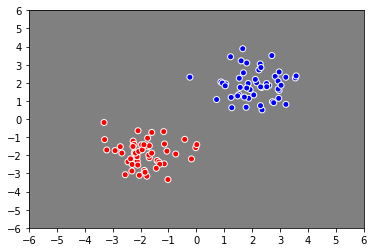

[[ 2.35534484  0.50733057  1.        ]
 [-2.09044382 -0.6442265   1.        ]
 [-2.35681578 -2.19429852  1.        ]
 [-1.93925039 -1.6923125   1.        ]
 [ 3.57616059  2.38285293  1.        ]
 [ 2.34248214  1.74365198  1.        ]
 [ 2.59506279  1.85228027  1.        ]
 [-2.67017268 -1.8757508   1.        ]
 [-2.31008544 -2.86504805  1.        ]
 [ 1.48013322  1.27855201  1.        ]
 [-2.29986993 -2.50555391  1.        ]
 [ 1.2702917   0.62779156  1.        ]
 [-1.40792221 -2.28583757  1.        ]
 [ 1.22659823  3.43975201  1.        ]
 [ 2.31414964  2.84494214  1.        ]
 [ 2.29940313  0.74130758  1.        ]
 [ 0.93238938  1.98670686  1.        ]
 [-0.23143411  2.31209443  1.        ]
 [-2.72638159 -1.52421224  1.        ]
 [-2.32669505 -2.22268715  1.        ]
 [ 1.925801    1.62858097  1.        ]
 [-2.27123565 -1.51098827  1.        ]
 [ 1.78556763  0.65177597  1.        ]
 [-2.55011628 -3.06874399  1.        ]
 [-1.96468813 -1.41727174  1.        ]
 [-3.28852758 -1.13282813

In [154]:
#np.random.seed(1)
X=generateData(num_examples=100, distributionShape='g', numClasses=2, numOutputs=2)
np.random.shuffle(X)
t = np.copy(X[:,3:])
X = np.delete(X, np.s_[3:], 1)
print(X)
if t.ndim == 1:
    t = t.reshape(-1,1)

# Part 1.b) Add noise

To add an option for adding label noise into the dataset, I used default argument noise_prob=0 in generateData() function only which takes in value from 0 to 100 as the probability of noise in labels. The following code generates the data set with noise probability = 10.  
Note: Use previous cell to generate dataset without noise if you are evaluating code for accuracies of predictions.

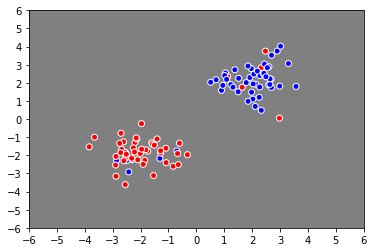

[[-2.48940513 -2.28179988  1.        ]
 [ 2.69510893  3.52372697  1.        ]
 [ 2.89713417  3.75255978  1.        ]
 [ 0.95017327  1.86023747  1.        ]
 [ 2.63424549  1.91164238  1.        ]
 [ 0.70738212  2.17082712  1.        ]
 [ 1.12407052  2.35309155  1.        ]
 [-1.9593538  -1.66120452  1.        ]
 [-2.1994963  -1.29188707  1.        ]
 [ 1.5168635   2.25083818  1.        ]
 [ 2.11016097  0.69804933  1.        ]
 [-2.88049534 -3.15529104  1.        ]
 [ 2.69067625  1.74415872  1.        ]
 [ 1.08452689  2.19258967  1.        ]
 [-2.5369969  -1.84136022  1.        ]
 [ 0.51361451  2.03493519  1.        ]
 [-2.87991301 -2.06045737  1.        ]
 [ 1.9186033   2.29559417  1.        ]
 [ 2.32712043  0.48291126  1.        ]
 [ 1.85074418  2.92827086  1.        ]
 [ 1.01595349  2.40254785  1.        ]
 [-2.31740282 -2.16060646  1.        ]
 [-2.8583749  -2.27947418  1.        ]
 [ 3.01900474  4.02266057  1.        ]
 [ 3.5736814   1.80109218  1.        ]
 [-0.67215826 -1.90254298

In [149]:
np.random.seed(1)
X=generateData(num_examples=100, distributionShape='g', numClasses=2, numOutputs=1, noise_prob=10)
np.random.shuffle(X)
t = np.copy(X[:,3:])
X = np.delete(X, np.s_[3:], 1)
print(X)
if t.ndim == 1:
    t = t.reshape(-1,1)

# Part 1.c) Train a small feedforward neural network

__The following code contains:__  
train() method - to train the neural network on given dataset.  
predict() method - returns the predicted class value of the given data along with the cross entropy error for each prediction  
calculate_error() method - calculates the cross-entropy error for all the predictions made.

In [152]:
def calculate_error(true_labels, pred_labels, numOutputs):
    if numOutputs == 1:
        error_vec = -((true_labels*(np.log(pred_labels))) + ((1-true_labels)*(np.log(1-pred_labels))))
        return error_vec
    else:
        error_vec = -(true_labels*(np.log(pred_labels)))
        error_sum = np.sum(error_vec, axis=1)
        return error_sum

def train(X, numInput, numHiddenUnits, numOutput, activationType, numIter):
    W1 = 2*np.random.random((numInput,numHiddenUnits)) - 1
    W2 = 2*np.random.random((numHiddenUnits,numOutput)) - 1
    for j in range(numIter):
        if activationType == 'linear':
            h = np.dot(X,W1)
            if numOutput == 1:
                y = 1/(1+np.exp(-(np.dot(h,W2))))
                y_delta = (t - y)*(y*(1-y))
            elif numOutput == 2:
                y = np.exp(np.dot(h,W2))/((np.sum(np.exp(np.dot(h,W2)),axis=1)).reshape(-1,1))
                y_delta = (t - y)
            h_delta = np.dot(y_delta, W2.T)
            W2 += 0.1*np.dot(h.T, y_delta)
            W1 += 0.1*np.dot(X.T, h_delta)
            
        elif activationType == 'reLU':
            z1 = np.dot(X,W1)
            h = np.where(z1<=0,0,z1)
            z2 = np.dot(h,W2)
            if numOutput == 1:
                y = 1/(1+np.exp(-(z2)))
                y_delta = (t - y)
                z2_delta = y_delta*(y*(1-y))
            elif numOutput == 2:
                z2 = np.clip(z2,-100,100)
                y = np.exp(z2)/((np.sum(np.exp(z2),axis=1)).reshape(-1,1))
                z2_delta = (t - y)
            h_delta = np.dot(z2_delta, W2.T)
            z1_delta = np.where(z1<=0,0,h_delta)
            W2 += 0.1*np.dot(h.T, z2_delta)
            W1 += 0.1*np.dot(X.T, z1_delta)
            
        else:
            h = 1/(1+np.exp(-(np.dot(X,W1))))
            if numOutput == 1:
                y = 1/(1+np.exp(-(np.dot(h,W2))))
                y_delta = (t - y)*(y*(1-y))
            elif numOutput == 2:
                y = np.exp(np.dot(h,W2))/((np.sum(np.exp(np.dot(h,W2)),axis=1)).reshape(-1,1))
                y_delta = t - y
            h_delta = np.dot(y_delta, W2.T) * (h * (1-h))
            W2 += 0.1*np.dot(h.T, y_delta)
            W1 += 0.1*np.dot(X.T, h_delta)
    return (W1, W2)

def predict(x, W1, W2, numInput, numHiddenUnits, numOutput, activationType, verbosity):
    if activationType == 'linear':
        z1 = np.dot(x,W1)
        h_pred = z1
        z2 = np.dot(h_pred,W2)
        if numOutput == 1:
            y_pred = 1/(1+np.exp(-(z2)))
        elif numOutput == 2:
            y_pred = np.exp(z2)/((np.sum(np.exp(z2),axis=1)).reshape(-1,1))

    elif activationType == 'reLU':
        z1 = np.dot(x,W1)
        h_pred = np.where(z1<=0,0,z1)
        z2 = np.dot(h_pred,W2)
        if numOutput == 1:
            y_pred = 1/(1+np.exp(-(z2)))
        elif numOutput == 2:
            z2 = np.clip(z2,-100,100)
            y_pred = np.exp(z2)/((np.sum(np.exp(z2),axis=1)).reshape(-1,1))
            
    else:
        z1 = np.dot(x,W1)
        h_pred = 1/(1+np.exp(-(z1)))
        z2 = np.dot(h_pred,W2)
        if numOutput == 1:
            y_pred = 1/(1+np.exp(-(z2)))
        elif numOutput == 2:
            y_pred = np.exp(z2)/((np.sum(np.exp(z2),axis=1)).reshape(-1,1))
            
    error = calculate_error(t, y_pred,numOutput)
    error = error.reshape(-1,1)
    return np.hstack((y_pred,error))

The following code snippet returns weights W1 (between input layer and hidden layer) and W2 (between hidden layer and output layer). The shapes of W1 and W2 are dependent on number of inputs, number of units in hidden layer and number of outputs. If number of outputs given is 1, then activation function used in output layer is sigmoid and if number of outputs is 2, activation function is softmax.  Here, numInput=3 because I have generated dataset with x-coordinate, y-coordinate, and 1 for bias.

In [160]:
W1,W2=train(X, numInput=3, numHiddenUnits=4, numOutput=2, activationType='sigmoid', numIter=100)
print(W1,W2)

[[ 1.0868569  -0.25064945 -1.61522341  1.17135548]
 [ 1.6463337  -1.95556328 -0.98607644  1.95873281]
 [-0.38419811  0.95930898 -0.77350939 -0.23101593]] [[-1.76358849  1.87734387]
 [ 1.63778055 -1.16783155]
 [ 2.90709007 -2.6281333 ]
 [-2.33444316  2.17201338]]


The below code returns predicted values on given test dataset. Here, I am using train dataset again to get the predictions. In case of numOutput=2, the first 2 columns signify probability of datapoint being of class 0 and class 1. The last column shows the cross-entropy error of the prediction.

In [71]:
predictions = predict(X, W1, W2, numInput=3, numHiddenUnits=4, numOutput=2, activationType='linear', verbosity=0)
print(predictions)

[[1.00000000e+000 1.28956947e-074 0.00000000e+000]
 [1.00000000e+000 4.86616079e-068 0.00000000e+000]
 [1.00000000e+000 3.23247422e-026 0.00000000e+000]
 [2.62108595e-069 1.00000000e+000 0.00000000e+000]
 [1.44255294e-076 1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 7.20127570e-083 0.00000000e+000]
 [3.05352133e-094 1.00000000e+000 0.00000000e+000]
 [5.03635779e-102 1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 1.50871111e-051 0.00000000e+000]
 [9.86682294e-085 1.00000000e+000 0.00000000e+000]
 [1.92999563e-103 1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 2.03420645e-073 0.00000000e+000]
 [1.00000000e+000 7.05264753e-046 0.00000000e+000]
 [2.20887861e-089 1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 3.80608374e-068 0.00000000e+000]
 [1.00000000e+000 8.94532144e-054 0.00000000e+000]
 [1.00000000e+000 2.57130081e-065 0.00000000e+000]
 [1.29553867e-078 1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 3.04467882e-099 0.00000000e+000]
 [3.33075327e-076 1.00000000e+0

# Part 1.d)

In previous sections, there was no condition on number of input columns while generating dataset so I created dataset with 3 columns i.e. x coordinate, y-coordinate, and a 1 for bias, but in this section since there is a condition on dataset used in Model() class so I have modified the previous generateData() method. It now generates dataset with only 2 columns of input and rest columns as true labels. Additional 1 for bias is added later in the setInput() and setTest() methods. The following cell has the modified code.

In [161]:
import numpy as np
import matplotlib.pyplot as plt

def visualizeData(num_examples, result_matrix):
    plt.rcParams['axes.facecolor'] = 'grey'
    if result_matrix.shape[1] == 3:
        col1 = np.where(result_matrix[0:num_examples,2]==0,'red','blue')
        col2 = np.where(result_matrix[num_examples:2*num_examples,2]==0,'red','blue')
    else:
        col1 = np.where(result_matrix[0:num_examples,2]==1,'red','blue')
        col2 = np.where(result_matrix[num_examples:2*num_examples,2]==1,'red','blue')
    plt.scatter(result_matrix[0:num_examples,0], result_matrix[0:num_examples,1], c=col1, label=1, edgecolors='white')
    plt.scatter(result_matrix[num_examples:2*num_examples,0], result_matrix[num_examples:2*num_examples,1], c=col2, label=2, edgecolors='white')
    plt.xticks(np.arange(-6, 7, 1))
    plt.yticks(np.arange(-6, 7, 1))
    plt.show()
    
def generateData(num_examples, distributionShape, numClasses=2, numOutputs=1, noise_prob=0):
    num_examples = int(num_examples/2)
    if distributionShape == 'g':
        X1, Y1, X2, Y2 = generateClustersData(num_examples)
    else:
        X1, Y1, X2, Y2 = generateCirclesData(num_examples)
    if numClasses < 2:
        print("Enter at least 2 classes")
        return
    elif numClasses == 2:
        if numOutputs == 1:
            result_matrix = np.empty((2*num_examples, 3))
            result_matrix[0:num_examples, 0] = X1
            result_matrix[0:num_examples, 1] = Y1
            result_matrix[0:num_examples, 2] = 0
            result_matrix[0:int((noise_prob/100)*num_examples),2] = 1
            result_matrix[num_examples:, 0] = X2
            result_matrix[num_examples:, 1] = Y2
            result_matrix[num_examples:, 2] = 1
            result_matrix[num_examples:num_examples+int((noise_prob/100)*num_examples),2] = 0
        elif numOutputs == 2:
            result_matrix = np.empty((2*num_examples, 4))
            result_matrix[0:num_examples, 0] = X1
            result_matrix[0:num_examples, 1] = Y1
            result_matrix[0:num_examples, 2] = 1
            result_matrix[0:num_examples, 3] = 0
            result_matrix[0:int((noise_prob/100)*num_examples),2] = 0
            result_matrix[0:int((noise_prob/100)*num_examples),3] = 1
            result_matrix[num_examples:, 0] = X2
            result_matrix[num_examples:, 1] = Y2
            result_matrix[num_examples:, 2] = 0
            result_matrix[num_examples:, 3] = 1
            result_matrix[num_examples:num_examples+int((noise_prob/100)*num_examples),2] = 1
            result_matrix[num_examples:num_examples+int((noise_prob/100)*num_examples),3] = 0
    visualizeData(num_examples, result_matrix)
    return result_matrix

def generateClustersData(num_examples):
    #np.random.seed(4)
    temp1 = np.random.normal(-2.0, 0.5, (2*num_examples,))
    temp2 = np.random.normal(2.0, 0.5, (2*num_examples,))
    X1 = temp1[:num_examples]
    Y1 = temp1[num_examples:]
    X2 = temp2[:num_examples]
    Y2 = temp2[num_examples:]
    return X1, Y1, X2, Y2

def generateCirclesData(num_examples):
    #np.random.seed(4)
    tempX = list((16*(np.random.random((100000,))))-8)
    tempY = list((16*(np.random.random((100000,))))-8)
    X1 = []
    Y1 = []
    X2 = []
    Y2 = []
    count1 = 1
    count2 = 1
    for x,y in zip(tempX[:50000], tempY[:50000]):
        if count1 > num_examples: 
            break
        sum = x**2 + y**2
        if count1 <= num_examples and sum <= 6.25:
            X1.append(x)
            Y1.append(y)
            count1 = count1 + 1
    for x,y in zip(tempX[50000:], tempY[50000:]):
        if count2 > num_examples: 
            break
        sum = x**2 + y**2
        if count2 <= num_examples and (sum > 12.25 and sum <= 25):
            X2.append(x)
            Y2.append(y)
            count2 = count2 + 1
    X1 = np.asarray(X1)
    X2 = np.asarray(X2)
    Y1 = np.asarray(Y1)
    Y2 = np.asarray(Y2)
    return X1, Y1, X2, Y2

The following cell contains Model class with all the required methods. It has setWeights(value) and initWeights(mean, std) methods to set or initialize weights.  
In the class below, for finding softmax activations, I have used np.clip() to prevent exp values from overflowing. I have clipped vector values from -100 to 100. If you wish to change them you may check that in code by searching 'overflow'.

In [162]:
class Model:
    def __init__(self, numInputs=2, numOutputs=1, layerSize=2, numHiddenLayers=2, activationType='R'):
        self.numInputs=numInputs
        self.numOutputs=numOutputs
        self.layerSize=layerSize
        self.numHiddenLayers=numHiddenLayers
        self.activationType=activationType
    
    def setInput(self, data):
        self.train_data = np.empty((data.shape[0],3))
        self.train_data[:,:2] = data[:, :2]
        self.train_data[:,2] = 1
        self.train_labels = np.copy(data[:, 2:])
    
    def setTest(self, data):
        self.test_data = np.empty((data.shape[0],3))
        self.test_data[:,:2] = data[:, :2]
        self.test_data[:,2] = 1
        self.test_labels = np.copy(data[:, 2:])
        return self.test_data
    
    def initWeights(self, mean, std):
        self.weights_list = []
        for i in range(0, self.numHiddenLayers+1):
            if i == 0:
                self.weights_list.append(np.random.normal(mean, std, (self.numInputs+1, self.layerSize)))
            elif i != self.numHiddenLayers:
                self.weights_list.append(np.random.normal(mean, std, (self.layerSize, self.layerSize)))
            else:
                self.weights_list.append(np.random.normal(mean, std, (self.layerSize, self.numOutputs)))
        
    def setWeights(self, value):
        self.weights_list = []
        for i in range(0, self.numHiddenLayers+1):
            if i == 0:
                self.weights_list.append(np.full((self.numInputs+1, self.layerSize), value))
            elif i != self.numHiddenLayers:
                self.weights_list.append(np.full((self.layerSize, self.layerSize), value))
            else:
                self.weights_list.append(np.full((self.layerSize, self.numOutputs), value))
        
    def calculate_error(self, true_labels, pred_labels):
        if self.numOutputs == 1:
            error_vec = -((true_labels*(np.log(pred_labels))) + ((1-true_labels)*(np.log(1-pred_labels))))
            return np.average(error_vec)
        else:
            error_vec = -(true_labels*(np.log(pred_labels)))
            error_sum = np.sum(error_vec, axis=1)
            return np.average(error_sum)
    
    def predict(self, x):
        if self.activationType == 'L':
            z = np.dot(x, self.weights_list[0])
            for i in range(1,self.numHiddenLayers+1):
                h = z
                z = np.dot(h, self.weights_list[i])
            if self.numOutputs == 1:
                y = 1/(1+np.exp(-z))
            else:
                y = np.exp(z)/((np.sum(np.exp(z),axis=1)).reshape(-1,1))
            return y

        elif self.activationType == 'R':
            z = np.dot(x, self.weights_list[0])
            for i in range(1,self.numHiddenLayers+1):
                h = np.where(z<=0, 0, z)
                z = np.dot(h, self.weights_list[i])
            if self.numOutputs == 1:
                y = 1/(1+np.exp(-z))
            else:
                # to prevent exp values from overflowing
                z = np.clip(z,-100,100)
                y = np.exp(z)/((np.sum(np.exp(z),axis=1)).reshape(-1,1))
            return y

        else:
            z = np.dot(x, self.weights_list[0])
            for i in range(1,self.numHiddenLayers+1):
                h = 1/(1+np.exp(-z))
                z = np.dot(h, self.weights_list[i])
            if self.numOutputs == 1:
                y = 1/(1+np.exp(-z))
            else:
                y = np.exp(z)/((np.sum(np.exp(z),axis=1)).reshape(-1,1))
            return y

    def test(self):
        test_pred = self.predict(self.test_data)
        return self.calculate_error(self.test_labels, test_pred)
    
    def train(self, numIter, stepSize):
        error_list = []
        for j in range(numIter):
            if self.activationType == 'L':
                z_list = []
                h_list = []
                z = np.dot(self.train_data,self.weights_list[0])
                z_list.append(z)
                for i in range(self.numHiddenLayers):
                    h = z
                    h_list.append(h)
                    z = np.dot(h,self.weights_list[i+1])
                    z_list.append(z)
                z_delta_list = []
                if self.numOutputs == 1:
                    y = 1/(1+np.exp(-z))
                    y_delta = (self.train_labels-y)
                    z_delta = y_delta*(y*(1-y))
                else:
                    y = np.exp(z)/((np.sum(np.exp(z),axis=1)).reshape(-1,1))
                    z_delta = (self.train_labels-y)
                z_delta_list.append(z_delta)
                for i in range (self.numHiddenLayers,0,-1):
                    h_delta = np.dot(z_delta, self.weights_list[i].T)
                    z_delta = h_delta
                    z_delta_list.append(z_delta)
                
                z_delta_list.reverse()
                for i in range(self.numHiddenLayers,0,-1):
                    self.weights_list[i] += stepSize*np.dot(h_list[i-1].T, z_delta_list[i])
                self.weights_list[0] += stepSize*np.dot(self.train_data.T, z_delta_list[0])
                
            elif self.activationType == 'R':
                z_list = []
                h_list = []
                z = np.dot(self.train_data,self.weights_list[0])
                z_list.append(z)
                for i in range(self.numHiddenLayers):
                    h = np.where(z<=0,0,z)
                    h_list.append(h)
                    z = np.dot(h,self.weights_list[i+1])
                    z_list.append(z)
                z_delta_list = []
                if self.numOutputs == 1:
                    y = 1/(1+np.exp(-z))
                    y_delta = (self.train_labels-y)
                    z_delta = y_delta*(y*(1-y))
                else:
                    # to prevent exp values from overflowing
                    z = np.clip(z,-100,100)
                    y = np.exp(z)/((np.sum(np.exp(z),axis=1)).reshape(-1,1))
                    z_delta = (self.train_labels-y)
                z_delta_list.append(z_delta)
                for i in range (self.numHiddenLayers,0,-1):
                    h_delta = np.dot(z_delta, self.weights_list[i].T)
                    z_delta = np.where(z_list[i-1]<=0, 0, h_delta)
                    z_delta_list.append(z_delta)
                
                z_delta_list.reverse()
                for i in range(self.numHiddenLayers,0,-1):
                    self.weights_list[i] += stepSize*np.dot(h_list[i-1].T, z_delta_list[i])
                self.weights_list[0] += stepSize*np.dot(self.train_data.T, z_delta_list[0])
                
            else:
                z_list = []
                h_list = []
                z = np.dot(self.train_data,self.weights_list[0])
                z_list.append(z)
                for i in range(self.numHiddenLayers):
                    h = 1/(1+np.exp(-z))
                    h_list.append(h)
                    z = np.dot(h,self.weights_list[i+1])
                    z_list.append(z)
                z_delta_list = []
                if self.numOutputs == 1:
                    y = 1/(1+np.exp(-z))
                    y_delta = (self.train_labels-y)
                    z_delta = y_delta*(y*(1-y))
                else:
                    y = np.exp(z)/((np.sum(np.exp(z),axis=1)).reshape(-1,1))
                    z_delta = (self.train_labels-y)
                z_delta_list.append(z_delta)
                for i in range (self.numHiddenLayers,0,-1):
                    h_delta = np.dot(z_delta, self.weights_list[i].T)
                    z_delta = h_delta * (h_list[i-1] * (1-h_list[i-1]))
                    z_delta_list.append(z_delta)
                
                z_delta_list.reverse()
                for i in range(self.numHiddenLayers,0,-1):
                    self.weights_list[i] += stepSize*np.dot(h_list[i-1].T, z_delta_list[i])
                self.weights_list[0] += stepSize*np.dot(self.train_data.T, z_delta_list[0])
                
            train_pred = self.predict(self.train_data)
            test_pred = self.predict(self.test_data)
            train_error = self.calculate_error(self.train_labels, train_pred)
            test_error = self.calculate_error(self.test_labels, test_pred)
            error_list.append([train_error, test_error])
        error_array = np.asarray(error_list)
        plt.rcParams['axes.facecolor'] = 'white'
        plt.plot(error_array[:,0])
        plt.plot(error_array[:,1])
        plt.legend(['Train error', 'Test error'], loc='upper right')
        plt.xlabel('Iteration')
        plt.ylabel('Cross-entropy error')
        plt.show()
        return error_array

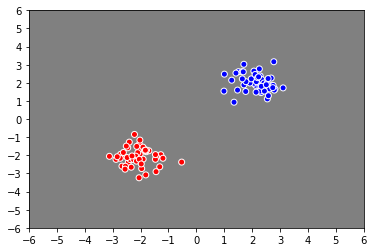

In [163]:
X = generateData(num_examples=100, distributionShape='g', numClasses=2, numOutputs=1)
np.random.shuffle(X)

For default values of Model(), i.e. numInputs=2, numOutputs=1, layerSize=2, numHiddenLayers=2, activationType
='R', the model doesn't train very well. This is probably because of the initial values of weights and datasets. It shows very slight improvement with each iteration as shown in the graph below.

In [164]:
net = Model()

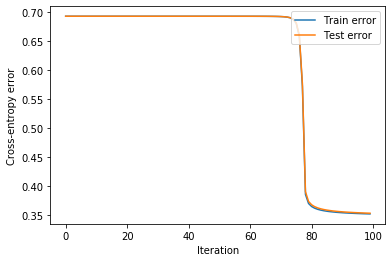

Train and Test set errors for each iteration: 
[[0.69314768 0.69314766]
 [0.69314764 0.69314762]
 [0.69314759 0.69314758]
 [0.69314755 0.69314754]
 [0.69314751 0.6931475 ]
 [0.69314747 0.69314747]
 [0.69314743 0.69314743]
 [0.69314739 0.6931474 ]
 [0.69314736 0.69314737]
 [0.69314732 0.69314734]
 [0.69314728 0.69314731]
 [0.69314724 0.69314727]
 [0.69314719 0.69314724]
 [0.69314713 0.6931472 ]
 [0.69314708 0.69314716]
 [0.69314704 0.69314711]
 [0.69314699 0.69314707]
 [0.69314693 0.69314702]
 [0.69314688 0.69314696]
 [0.69314681 0.6931469 ]
 [0.69314675 0.69314684]
 [0.69314667 0.69314677]
 [0.6931466  0.6931467 ]
 [0.69314652 0.69314663]
 [0.69314644 0.69314656]
 [0.69314635 0.69314648]
 [0.69314626 0.69314639]
 [0.69314616 0.69314631]
 [0.69314606 0.69314621]
 [0.69314595 0.69314611]
 [0.69314583 0.693146  ]
 [0.6931457  0.69314588]
 [0.69314557 0.69314576]
 [0.69314542 0.69314562]
 [0.69314526 0.69314547]
 [0.69314508 0.69314531]
 [0.69314489 0.69314514]
 [0.69314468 0.69314494]
 [0

In [165]:
X_train = X[:90]
X_test = X[90:]
net.setInput(X_train)
test_data = net.setTest(X_test)
net.initWeights(0,0.01)
trainError = net.train(100,0.1)
print("Train and Test set errors for each iteration: ")
print(trainError)
testError = net.test()
print("Test set error is: ", testError)
test_pred = net.predict(test_data)
print("Test set predictions: ", test_pred)

If we make changes to number of hidden layers and number of units in each layer i.e. layerSize=4, numHiddenLayers=1, the network performs very well for both train and test data.

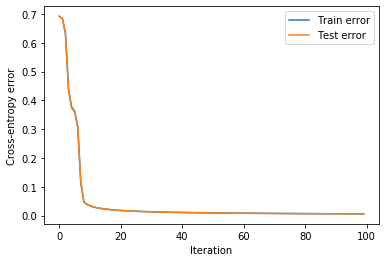

Train and Test set errors for each iteration: 
[[0.69209345 0.69209452]
 [0.6845905  0.68444559]
 [0.63339701 0.63225508]
 [0.44110523 0.43692583]
 [0.37671295 0.3732982 ]
 [0.36241417 0.35966488]
 [0.30786474 0.30745208]
 [0.11286278 0.11659263]
 [0.04677814 0.04828192]
 [0.0385049  0.03954904]
 [0.03356276 0.03433652]
 [0.03012192 0.03071499]
 [0.02753002 0.02799336]
 [0.02547988 0.02584556]
 [0.02380292 0.02409251]
 [0.02239698 0.02262575]
 [0.02119572 0.02137486]
 [0.02015375 0.02029173]
 [0.01923877 0.01934213]
 [0.01842702 0.01850093]
 [0.01770057 0.01774917]
 [0.01704558 0.01707225]
 [0.01645117 0.0164587 ]
 [0.01590865 0.01589937]
 [0.015411   0.01538685]
 [0.01495243 0.01491508]
 [0.01452817 0.01447903]
 [0.01413421 0.01407451]
 [0.01376717 0.01369796]
 [0.01342417 0.01334639]
 [0.01310275 0.0130172 ]
 [0.01280078 0.01270818]
 [0.01251642 0.01241739]
 [0.01224804 0.01214316]
 [0.01199425 0.01188401]
 [0.01175379 0.01163864]
 [0.01152556 0.0114059 ]
 [0.01130858 0.01118477]
 [0

In [166]:
X_train = X[:90]
X_test = X[90:]
net = Model(numInputs=2, numOutputs=1, layerSize=4, numHiddenLayers=1, activationType='R')
net.setInput(X_train)
test_data = net.setTest(X_test)
net.initWeights(0,0.01)
trainError = net.train(100,0.1)
print("Train and Test set errors for each iteration: ")
print(trainError)
testError = net.test()
print("Test set error is: ", testError)
test_pred = net.predict(test_data)
print("Test set predictions: ", test_pred)

# Part 1.e) Allow a variable number of hidden units.

In [167]:
net = Model(2,1,5,2,'R')

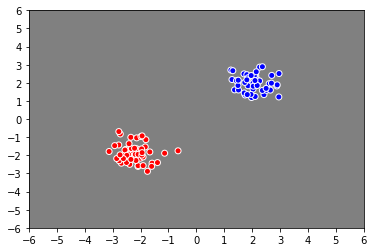

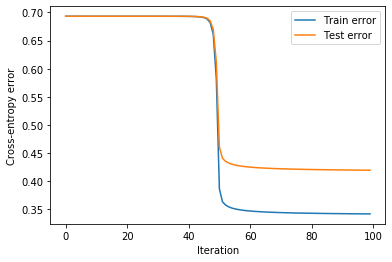

Train and Test set errors for each iteration: 
[[0.69314662 0.69314678]
 [0.69314646 0.69314667]
 [0.6931463  0.69314655]
 [0.69314612 0.69314643]
 [0.69314593 0.6931463 ]
 [0.69314574 0.69314616]
 [0.69314556 0.69314605]
 [0.69314539 0.69314593]
 [0.69314521 0.69314581]
 [0.69314502 0.69314568]
 [0.6931448  0.69314553]
 [0.69314457 0.69314537]
 [0.6931443  0.69314519]
 [0.69314401 0.69314498]
 [0.69314368 0.69314475]
 [0.6931433  0.69314449]
 [0.69314288 0.69314419]
 [0.6931424  0.69314385]
 [0.69314186 0.69314347]
 [0.69314124 0.69314303]
 [0.69314052 0.69314253]
 [0.69313969 0.69314195]
 [0.69313872 0.69314127]
 [0.6931376  0.69314047]
 [0.69313628 0.69313954]
 [0.69313474 0.69313843]
 [0.6931329  0.69313713]
 [0.69313072 0.69313556]
 [0.69312808 0.69313368]
 [0.69312489 0.69313139]
 [0.69312096 0.69312858]
 [0.6931161  0.6931251 ]
 [0.69311    0.69312073]
 [0.69310226 0.69311518]
 [0.69309229 0.69310803]
 [0.69307924 0.69309865]
 [0.69306185 0.69308615]
 [0.69303818 0.69306913]
 [0

In [168]:
X = generateData(num_examples=100, distributionShape='g', numClasses=2, numOutputs=1)
np.random.shuffle(X)
X_train = X[:90]
X_test = X[90:]
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0,0.01)
trainError = net.train(100,0.1)
print("Train and Test set errors for each iteration: ")
print(trainError)
testError = net.test()
print("Test set error is: ", testError)
test_pred = net.predict(test_data)
print("Test set predictions: ", test_pred)

# Part 1.f) Allow the various possible activation types.

I have supported this for all three activation functions (relu, linear, sigmoid)

In [169]:
net = Model(2,1,2,2,'S')

This doesn't work well on the default values, but gives excellent results with layerSize=4, and numHiddenLayers=1

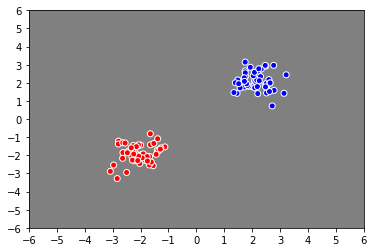

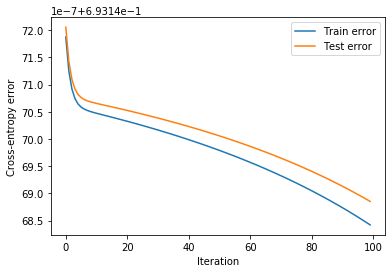

Train and Test set errors for each iteration: 
[[0.69314719 0.69314721]
 [0.69314712 0.69314714]
 [0.69314709 0.69314711]
 [0.69314707 0.69314709]
 [0.69314706 0.69314708]
 [0.69314706 0.69314708]
 [0.69314705 0.69314707]
 [0.69314705 0.69314707]
 [0.69314705 0.69314707]
 [0.69314705 0.69314707]
 [0.69314705 0.69314707]
 [0.69314705 0.69314706]
 [0.69314704 0.69314706]
 [0.69314704 0.69314706]
 [0.69314704 0.69314706]
 [0.69314704 0.69314706]
 [0.69314704 0.69314706]
 [0.69314704 0.69314706]
 [0.69314704 0.69314706]
 [0.69314703 0.69314705]
 [0.69314703 0.69314705]
 [0.69314703 0.69314705]
 [0.69314703 0.69314705]
 [0.69314703 0.69314705]
 [0.69314703 0.69314705]
 [0.69314702 0.69314705]
 [0.69314702 0.69314704]
 [0.69314702 0.69314704]
 [0.69314702 0.69314704]
 [0.69314702 0.69314704]
 [0.69314702 0.69314704]
 [0.69314701 0.69314704]
 [0.69314701 0.69314704]
 [0.69314701 0.69314703]
 [0.69314701 0.69314703]
 [0.69314701 0.69314703]
 [0.69314701 0.69314703]
 [0.693147   0.69314703]
 [0

In [170]:
X = generateData(num_examples=100, distributionShape='g', numClasses=2, numOutputs=1)
np.random.shuffle(X)
X_train = X[:90]
X_test = X[90:]
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0,0.01)
trainError = net.train(100,0.1)
print("Train and Test set errors for each iteration: ")
print(trainError)
testError = net.test()
print("Test set error is: ", testError)
test_pred = net.predict(test_data)
print("Test set predictions: ", test_pred)

# Part 1.g) Allow multiple output units, using softmax and a cross-entropy error. (Use external data file to run this)

In [177]:
net = Model(2,3,2,2,'S')

Here, the test error jumps up and down in initial iterations and then gets stable whereas train error starts decreasing early on.

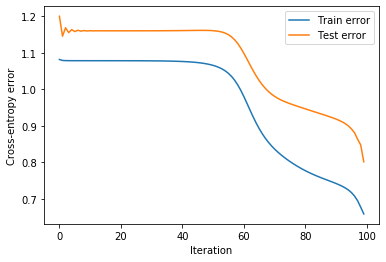

Train and Test set errors for each iteration: 
[[1.08185783 1.20025155]
 [1.07923937 1.14567668]
 [1.07880648 1.16867082]
 [1.07866611 1.15550056]
 [1.07860132 1.16365005]
 [1.07857194 1.15828929]
 [1.07855748 1.1618333 ]
 [1.07854981 1.15945047]
 [1.07854502 1.16104234]
 [1.0785414  1.15996791]
 [1.0785381  1.16068563]
 [1.07853473 1.16019999]
 [1.07853103 1.1605229 ]
 [1.07852685 1.16030362]
 [1.07852205 1.16044821]
 [1.0785165  1.16034964]
 [1.07851003 1.1604141 ]
 [1.07850247 1.16037041]
 [1.07849363 1.16039941]
 [1.07848328 1.16038099]
 [1.07847114 1.16039495]
 [1.07845688 1.16038873]
 [1.07844012 1.16039718]
 [1.07842042 1.16039771]
 [1.07839724 1.16040539]
 [1.07836995 1.1604108 ]
 [1.07833781 1.16042047]
 [1.07829993 1.16043072]
 [1.07825527 1.16044449]
 [1.07820256 1.1604606 ]
 [1.07814034 1.16048058]
 [1.07806682 1.16050437]
 [1.07797992 1.16053299]
 [1.07787712 1.16056691]
 [1.07775542 1.16060705]
 [1.07761125 1.16065412]
 [1.0774403  1.16070895]
 [1.07723743 1.16077225]
 [1

In [178]:
X = np.load('gaussian_data.npy')
np.random.shuffle(X)
X = X[:100,:]
X_train = X[:90]
X_test = X[90:]
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0,0.01)
trainError = net.train(100,0.1)
print("Train and Test set errors for each iteration: ")
print(trainError)
testError = net.test()
print("Test set error is: ", testError)
test_pred = net.predict(test_data)
print("Test set predictions: ", test_pred)

# Part 1.h) Allow multiple hidden layers.

In [217]:
net = Model(2,1,2,5,'R')

This model doesn't train well with 5 hidden layers. Try training with 4 units in 1 or 2 hidden layers.

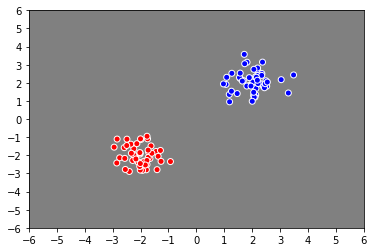

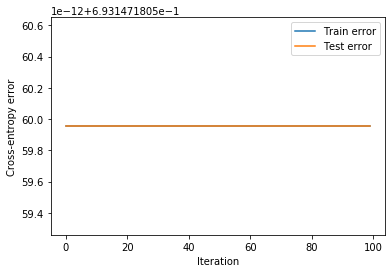

Train and Test set errors for each iteration: 
[[0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0.69314718 0.69314718]
 [0

In [218]:
X = generateData(num_examples=100, distributionShape='g', numClasses=2, numOutputs=1)
np.random.shuffle(X)
X_train = X[:90]
X_test = X[90:]
net.setInput(X_train)
net.setTest(X_test)
net.initWeights(0,0.01)
trainError = net.train(100,0.1)
print("Train and Test set errors for each iteration: ")
print(trainError)
testError = net.test()
print("Test set error is: ", testError)
test_pred = net.predict(test_data)
print("Test set predictions: ", test_pred)